<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import datetime as dt

<h3>Data Pre-Processing</h3>

In [ ]:
xls = pd.ExcelFile("C:\\Users\MR9\Downloads\cleaned.xlsx")
df_t = pd.read_excel(xls, 'Transactions')
df_cd = pd.read_excel(xls, 'CustomerDemographic')
df_ca = pd.read_excel(xls, 'CustomerAddress')
df_new = pd.read_excel(xls, 'NewCustomerList')


C:\Users\MR9\AppData\Local\Temp\ipykernel_3732\1183899891.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cd = pd.read_excel(xls, 'CustomerDemographic')


In [3]:
df_t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
1,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82
2,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05,690.49
3,15,12,247,2017-06-11,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2004-07-25,1055.82
4,16,3,2961,2017-10-10,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-09-09,1702.55


In [4]:
df_t['online_order'] = list(map(bool, df_t['online_order']))
df_t.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
1,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82
2,9,67,1305,2017-08-10,False,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05,690.49
3,15,12,247,2017-06-11,False,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2004-07-25,1055.82
4,16,3,2961,2017-10-10,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-09-09,1702.55


In [5]:
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,12,Sawyere,Flattman,Male,58,1994-07-21,28.942255,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0
1,14,Rayshell,Kitteman,Female,85,1983-03-25,40.273762,Account Executive,Financial Services,Affluent Customer,N,No,6.0
2,15,Erroll,Radage,Male,91,2000-07-13,22.958694,Junior Executive,Manufacturing,Mass Customer,N,No,1.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,NaN,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
df_ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
df_new.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1938-06-08,85.098420,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,1.04,1.3000,1.6250,1.38125,1,1,1.718750
1,Morly,Genery,Male,69,1938-06-09,85.095680,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,0.66,0.6600,0.8250,0.70125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1938-08-05,84.939516,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,0.57,0.5700,0.5700,0.57000,1,1,1.718750
3,Lucine,Stutt,Female,64,1938-08-30,84.871022,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,0.41,0.5125,0.5125,0.51250,4,4,1.703125
4,Melinda,Hadlee,Female,34,1938-08-31,84.868283,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.62,0.6200,0.7750,0.77500,4,4,1.703125


In [8]:
df_old = pd.merge(pd.merge(df_t, df_cd), df_ca)
df_old.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
1,11409,95,3120,2017-01-30,False,Approved,Giant Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
2,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
3,9155,91,3120,2017-10-30,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,13066,38,3120,2017-01-20,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [50]:
df_old["state"] = df_old["state"].replace("Victoria", "VIC")

In [9]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19963 entries, 0 to 19962
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19963 non-null  int64         
 1   product_id                           19963 non-null  int64         
 2   customer_id                          19963 non-null  int64         
 3   transaction_date                     19963 non-null  datetime64[ns]
 4   online_order                         19963 non-null  bool          
 5   order_status                         19963 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [10]:
df_old[['list_price', 'standard_cost', 'profit','past_3_years_bike_related_purchases']].describe()


,list_price,standard_cost,profit,past_3_years_bike_related_purchases
count,19963.000000,19773.000000,19963.000000,19963.000000
mean,1107.794215,556.091050,556.995822,48.752392
std,582.862930,405.966472,497.081495,28.611332
min,12.010000,7.210000,4.800000,0.000000
25%,575.270000,215.140000,135.850000,24.000000
50%,1163.890000,507.580000,445.210000,48.000000
75%,1635.300000,795.100000,830.240000,73.000000
max,2091.470000,1759.850000,2086.070000,99.000000


<h3> Data Exploration</h3>

**Age & Gender factors**

- Contribution of age group and wealth segment to profit

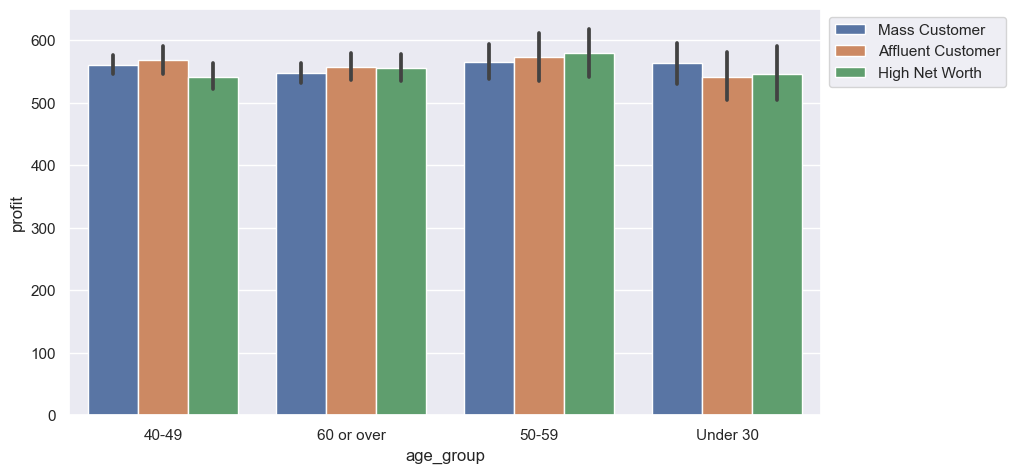

In [11]:
df_old["age_group"] = np.where(df_old['Age'] <
                                      30, "Under 30",
                                      (np.where(
                                        df_old['Age'] < 50,
                                        "40-49",
                                        (np.where(df_old['Age'] < 60,
                             "50-59",
                              "60 or over")))))

sns.set(style="darkgrid", rc={'figure.figsize':(9.7,5.27)})
chart1 = sns.barplot(data = df_old, x = 'age_group', y = 'profit', hue = 'wealth_segment')
plt.legend(loc='upper right')
chart1.legend(bbox_to_anchor= ( 1, 1))
chart1.figure.savefig("chart1", bbox_inches = 'tight')


- Product types ordered by different age groups

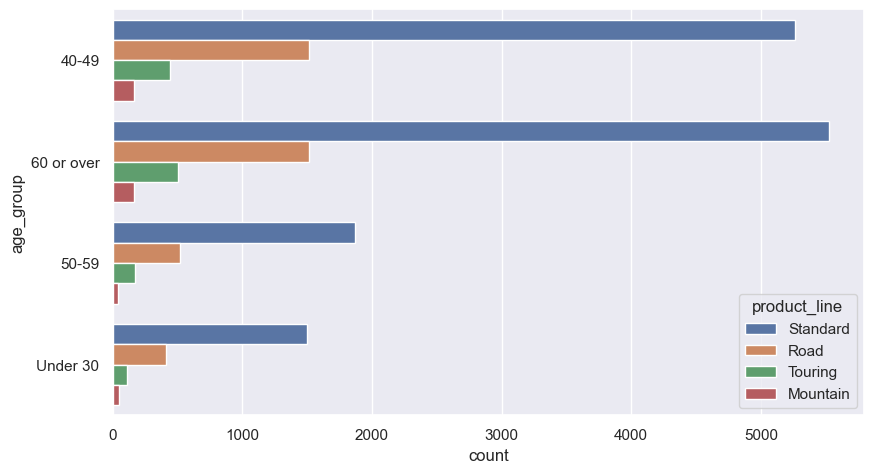

In [12]:
chart4= sns.countplot(data = df_old, y = 'age_group', hue = 'product_line')
chart4.figure.savefig("chart4")

- Number of customers with car ownership

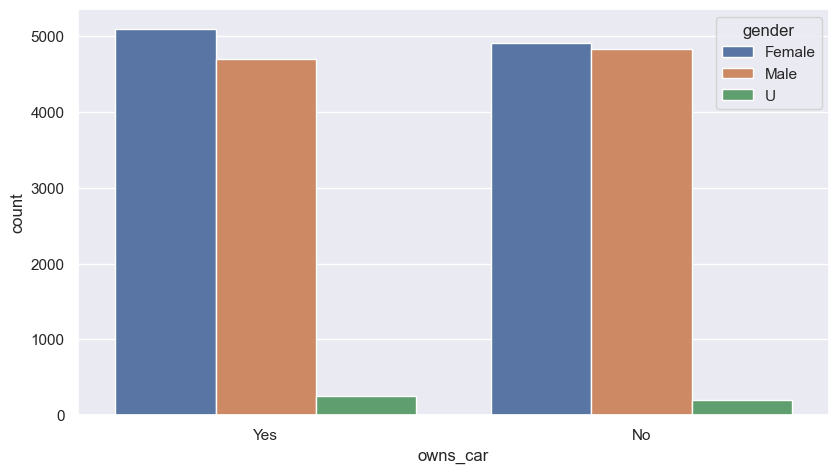

In [13]:
sns.set(style="darkgrid", rc={'figure.figsize':(9.7,5.27)})

chart2= sns.countplot(data = df_old, x = 'owns_car', hue = 'gender')
chart2.figure.savefig("chart2")



- Past 3 years of bike purchases by age groups and gender

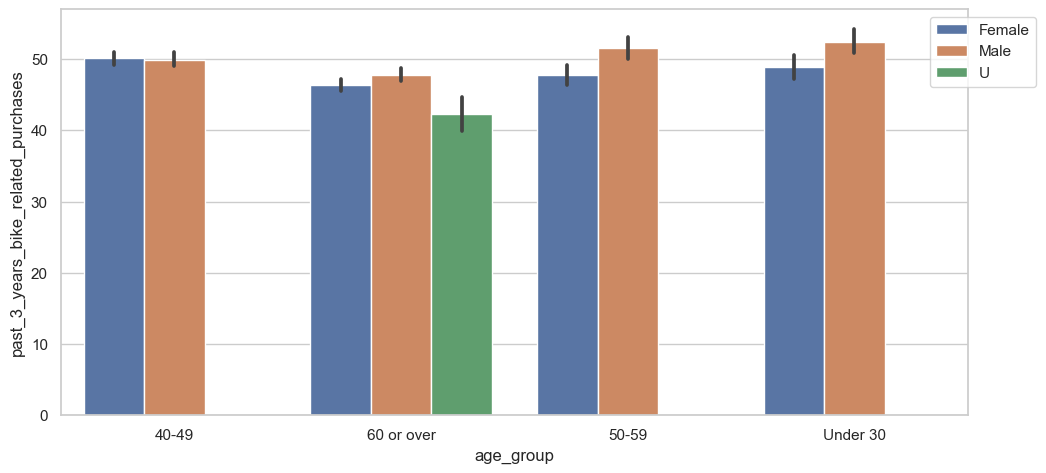

In [14]:
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,5.27)})

chart3= sns.barplot(data = df_old, x = 'age_group', y = 'past_3_years_bike_related_purchases', hue= 'gender')
plt.legend(loc='upper right')
chart3.legend(bbox_to_anchor= (0.95,1))
chart3.figure.savefig("chart3")


<h3>RFM Analysis </h3>

**Calculating Recency, Frequency & Monetary Value**

In [15]:
now = dt.datetime(2017, 12, 31)

rfm_df = df_old.groupby('customer_id').agg({'transaction_date': lambda x : (now - x.max()).days, #recency
                                           'transaction_id' : lambda x : len(x.unique()), #frequency
                                            'list_price' : lambda x : x.sum() #monetary value
                                           }).reset_index()
rfm_df.rename(columns = {'transaction_date' : 'recency', 'transaction_id' : 'frequency', 'list_price' : 'monetary'},inplace = True)
rfm_df.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,2,129,3,4149.07
2,4,196,2,1047.72
3,5,17,6,5903.20
4,6,65,5,5931.69


In [16]:
rfm_df.describe()


,customer_id,recency,frequency,monetary
count,3489.000000,3489.000000,3489.000000,3489.000000
mean,1751.905704,61.816280,5.721697,6338.462574
std,1009.388703,57.807681,2.326722,2958.934350
min,1.000000,1.000000,1.000000,60.340000
25%,879.000000,18.000000,4.000000,4197.330000
50%,1752.000000,45.000000,6.000000,6021.830000
75%,2625.000000,86.000000,7.000000,8201.540000
max,3500.000000,354.000000,14.000000,19071.320000


**Plot to show RFM distribution**

C:\Users\MR9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

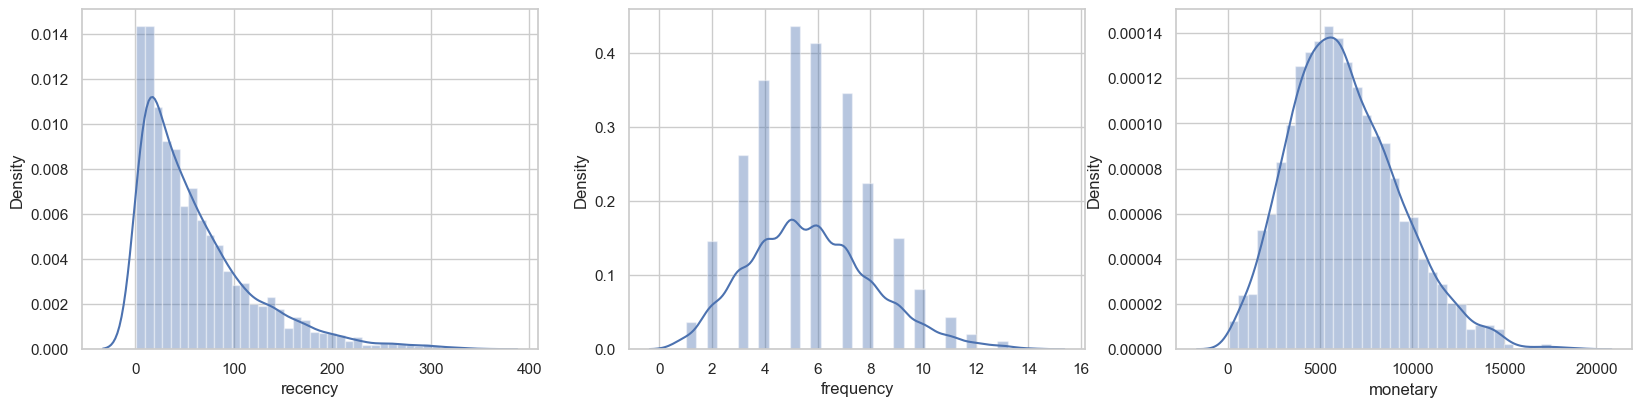

In [17]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
chart5 = sns.distplot(rfm_df['recency'])
plt.subplot(3, 3, 2)
chart5_1 = sns.distplot(rfm_df['frequency'])
plt.subplot(3, 3, 3)
chart5= sns.distplot(rfm_df['monetary'])
chart5.figure.savefig("chart5", bbox_inches = 'tight')


<h3>Customer Segmentation</h3>

**Normalize RFM data**

In [18]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,customer_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,8,11,9084.45,89.974033,97.835436,82.631126
1,2,129,3,4149.07,12.939988,12.370986,24.362281
2,4,196,2,1047.72,3.822851,4.329128,1.633706
3,5,17,6,5903.20,77.293710,57.239106,48.237317
4,6,65,5,5931.69,36.122331,40.481651,48.724563


**Create RFM Score**

In [19]:

rfm_df['RFM_score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['RFM_score']].head()

,RFM_score
0,4.40
1,0.96
2,0.14
3,2.76
4,2.23


In [20]:
rfm_df["customer_segment"] = np.where(rfm_df['RFM_score'] >
                                      4.5, "Top Customer",
                                      (np.where(
                                        rfm_df['RFM_score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_score'] > 1.6,
                            'Low Value Customer', 'Lost Customer'))))))
rfm_df[[ 'RFM_score', 'customer_segment']].head(20)

,RFM_score,customer_segment
0,4.40,High value Customer
1,0.96,Lost Customer
2,0.14,Lost Customer
3,2.76,Low Value Customer
4,2.23,Low Value Customer
5,0.22,Lost Customer
6,4.59,Top Customer
7,2.17,Low Value Customer
8,2.87,Low Value Customer
9,2.84,Low Value Customer


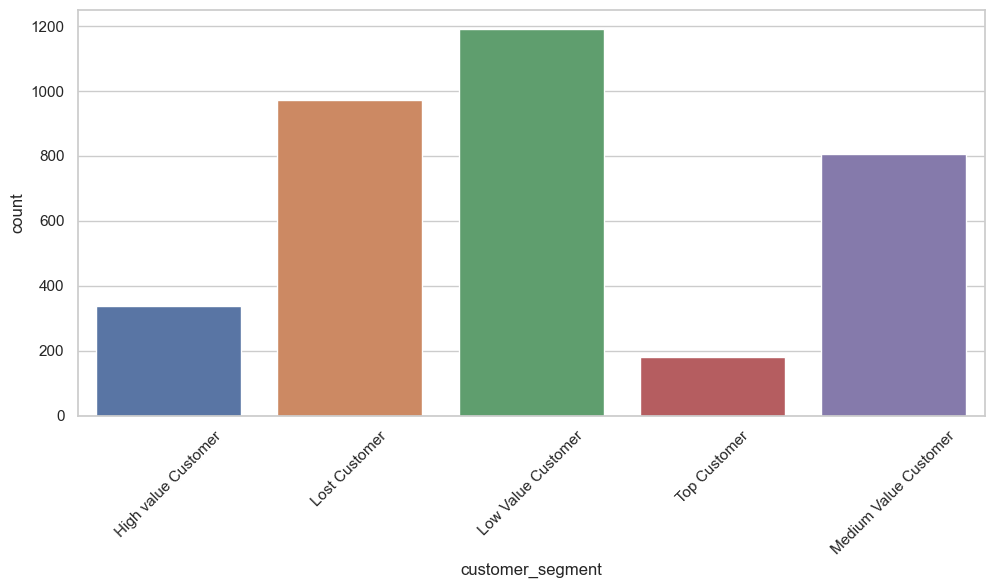

In [21]:
chart6 = sns.countplot(data = rfm_df, x = "customer_segment")
plt.xticks(rotation=45)
chart6.figure.savefig("chart6", bbox_inches = 'tight')

<h3>Visualization</h3>

**Analyze top three customer segments**

In [22]:
loyal_customer = rfm_df[rfm_df['customer_segment'].isin(['Top Customer', 'High value Customer', 'Medium Value Customer'])]



- State

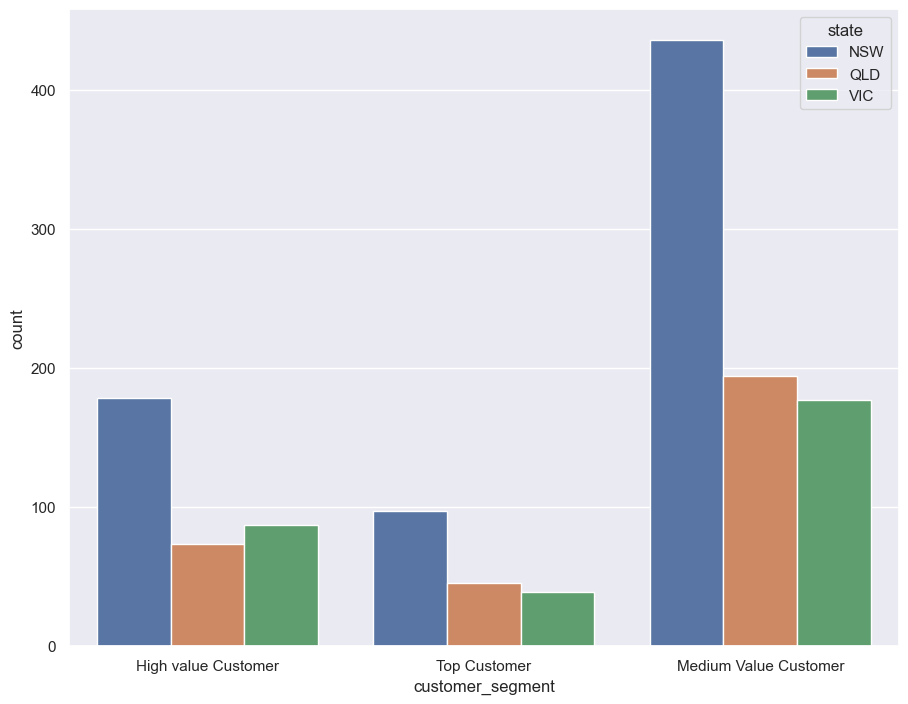

In [23]:
chart7 = sns.countplot(data = loyal_customer, x = 'customer_segment', hue = df_old['state'] )
chart7.figure.savefig("chart7", bbox_inches = 'tight')

- State & Car Ownership

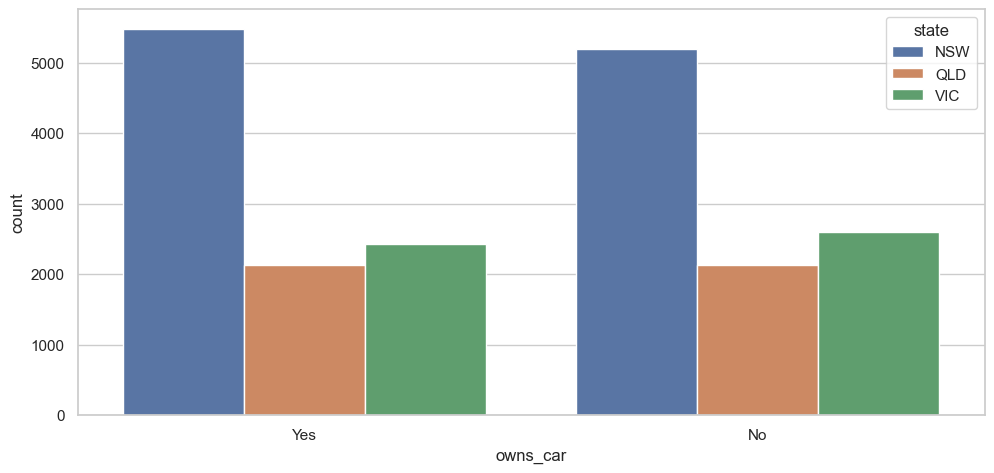

In [49]:
chart10= sns.countplot(data = loyal_customer, x = df_old['owns_car'], hue = df_old["state"] )
chart10.figure.savefig("chart10", bbox_inches = 'tight')


- Age Group

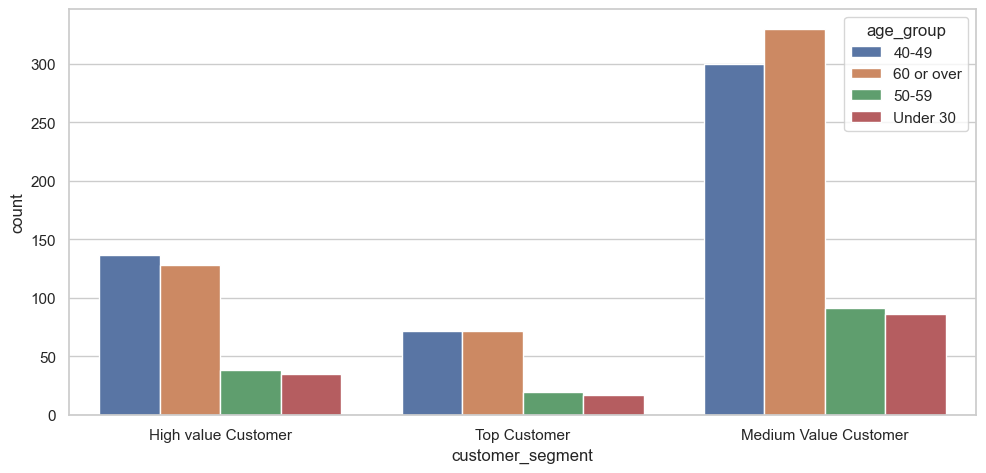

In [24]:
chart7 = sns.countplot(data = loyal_customer, x = "customer_segment", hue = df_old['age_group'])
chart7.figure.savefig("chart7", bbox_inches = 'tight')

- Product Class & Profit

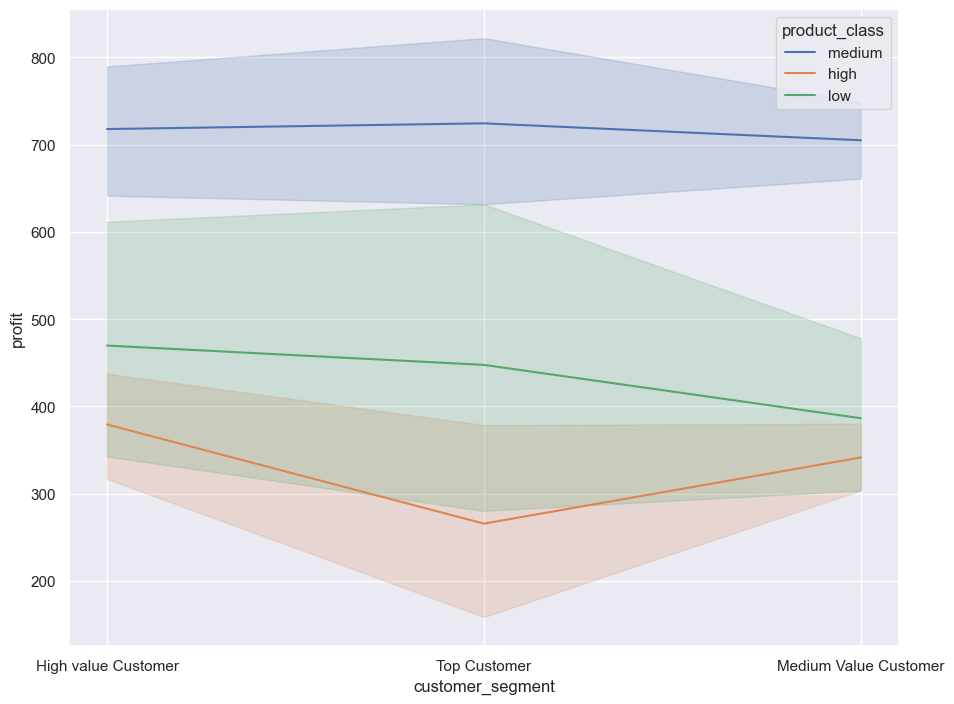

In [25]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
chart8 = sns.lineplot(data = loyal_customer, x = "customer_segment" , y = df_old['profit'], hue = df_old['product_class'])
chart8.figure.savefig("chart8", bbox_inches = 'tight')

- Job Industry

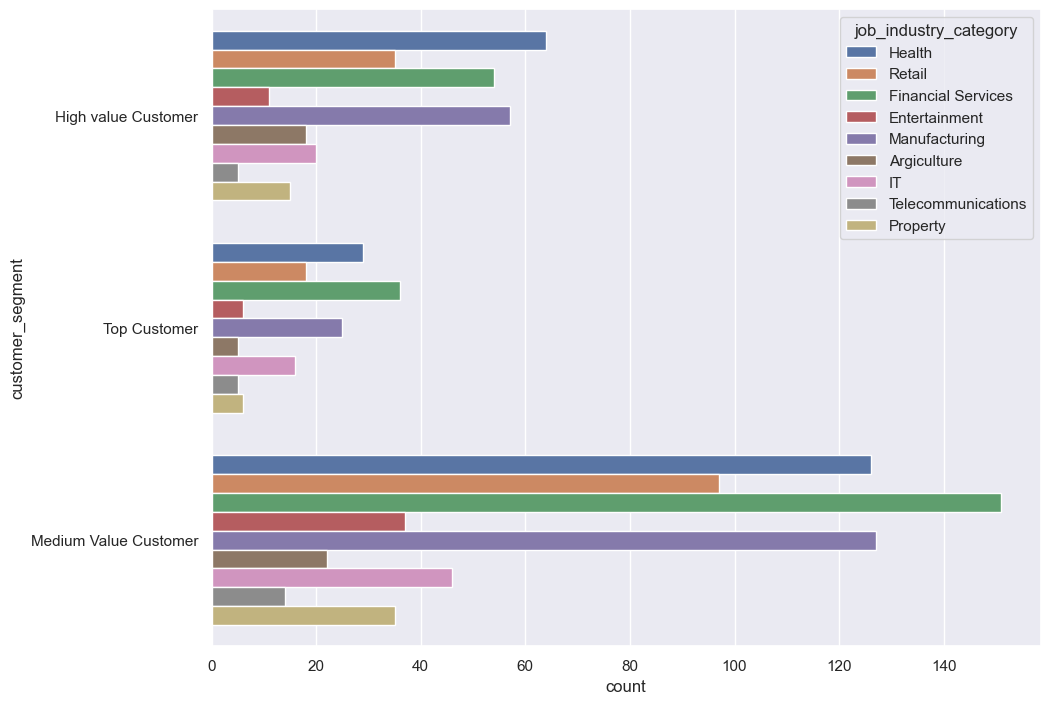

In [26]:
chart9 = sns.countplot(data = loyal_customer, y= 'customer_segment', hue = df_old['job_industry_category'] )
chart9.figure.savefig("chart9", bbox_inches = 'tight')

- Wealth Segment

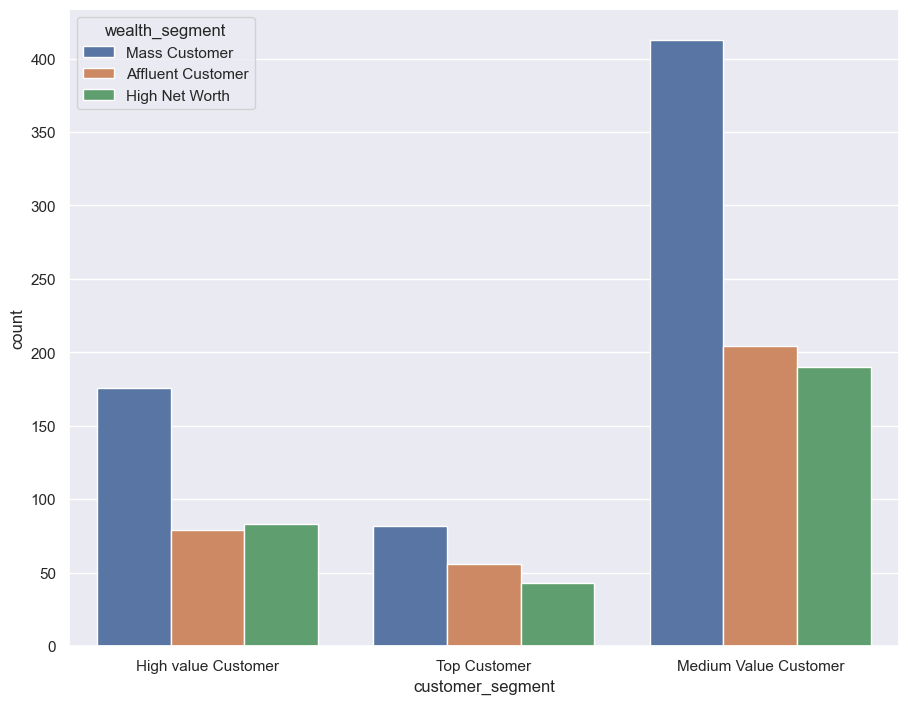

In [46]:
chart7_1 = sns.countplot(data = loyal_customer, x = 'customer_segment', hue = df_old['wealth_segment'] )
chart7_1.figure.savefig("chart7_1", bbox_inches = 'tight')

**Merging ideal customers with the characteristics**

In [35]:
target_customer =  pd.merge(df_old, loyal_customer, on = 'customer_id').dropna()
target_customer[['customer_id', "age_group","wealth_segment", "RFM_score","customer_segment"]].sort_values('customer_segment').head()

,customer_id,age_group,wealth_segment,RFM_score,customer_segment
7417,1106,60 or over,Mass Customer,4.44,High value Customer
6722,2095,40-49,Affluent Customer,4.39,High value Customer
3978,1890,50-59,Mass Customer,4.28,High value Customer
8912,1,60 or over,Mass Customer,4.40,High value Customer
8913,1,60 or over,Mass Customer,4.40,High value Customer
